Peneliti:Suma Bimantoro Andru

---

Problem:Apakah distribusi pembuangan sampah sudah normal, apakah butuh penambahan tempat pembuangan sampah.
Metode peneliti:peneliti akan menganalisa dengan perhitungan statistika dan matematika untuk menganalisa problem tersebut


select report_date,load_time,load_type,load_weight,dropoff_site from `bigquery-public-data.austin_waste.waste_and_diversion`
where report_date BETWEEN '2021-01-01' AND '2021-07-09'

In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import t
from numpy import percentile
import seaborn as sns

**Load data Tampil head dan tail dari dataset**

In [240]:
df=pd.read_csv('/content/drive/MyDrive/bq-results-20220819-092029-1660901150463/h8dsft_P0GC2_Suma-Bimantoro-Andru.csv')
df

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-07-08,2021-07-08 12:00:00 UTC,TIRES,2260.0,MRF
1,2021-07-08,2021-07-08 11:00:00 UTC,TIRES,1260.0,MRF
2,2021-07-08,2021-07-08 03:00:00 UTC,TIRES,800.0,MRF
3,2021-05-01,2021-05-01 12:29:00 UTC,TIRES,760.0,MRF
4,2021-07-03,2021-07-03 12:09:00 UTC,TIRES,1400.0,MRF
...,...,...,...,...,...
26152,2021-03-01,2021-03-01 11:26:00 UTC,ORGANICS,12100.0,ORGANICS BY GOSH
26153,2021-03-01,2021-03-01 04:27:00 UTC,ORGANICS,10900.0,ORGANICS BY GOSH
26154,2021-03-01,2021-03-01 05:55:00 UTC,ORGANICS,21800.0,ORGANICS BY GOSH
26155,2021-03-01,2021-03-02 01:10:00 UTC,ORGANICS,5640.0,ORGANICS BY GOSH


**Cleaning Missing Value**

In [241]:
#cek missing value
df.isnull().sum()

report_date        0
load_time          0
load_type          0
load_weight     1048
dropoff_site       0
dtype: int64

In [242]:
#rubah missing value dengan nilai median
median = df['load_weight'].median()
df['load_weight'].fillna(median, inplace=True)
df.isnull().sum()

report_date     0
load_time       0
load_type       0
load_weight     0
dropoff_site    0
dtype: int64

**Eksplorasi Data**

In [243]:
#melihat rentang waktu pengambilan data
df[['report_date']]

,report_date
0,2021-07-08
1,2021-07-08
2,2021-07-08
3,2021-05-01
4,2021-07-03
...,...
26152,2021-03-01
26153,2021-03-01
26154,2021-03-01
26155,2021-03-01


In [244]:
#melihat ada berapa kali pengambilan sampah
df['load_time'].nunique()

19766

In [245]:
df['load_time'].value_counts()

2021-03-05 12:00:00 UTC    30
2021-01-27 12:00:00 UTC    26
2021-06-02 12:00:00 UTC    25
2021-03-11 12:00:00 UTC    23
2021-03-08 12:00:00 UTC    20
                           ..
2021-04-26 02:58:00 UTC     1
2021-04-26 02:42:00 UTC     1
2021-04-26 04:53:00 UTC     1
2021-04-26 02:25:00 UTC     1
2021-03-01 10:22:00 UTC     1
Name: load_time, Length: 19766, dtype: int64

In [246]:
#m
report=df['report_date'].unique()
report

array(['2021-07-08', '2021-05-01', '2021-07-03', '2021-02-27',
       '2021-05-08', '2021-04-18', '2021-04-17', '2021-03-20',
       '2021-06-12', '2021-03-06', '2021-03-13', '2021-01-16',
       '2021-04-03', '2021-02-06', '2021-05-22', '2021-07-09',
       '2021-06-05', '2021-01-23', '2021-05-29', '2021-06-26',
       '2021-05-15', '2021-03-27', '2021-04-10', '2021-01-09',
       '2021-01-30', '2021-04-24', '2021-02-11', '2021-01-01',
       '2021-06-19', '2021-02-28', '2021-03-07', '2021-03-28',
       '2021-02-19', '2021-02-07', '2021-02-21', '2021-05-30',
       '2021-03-14', '2021-03-21', '2021-03-02', '2021-03-03',
       '2021-03-04', '2021-03-05', '2021-03-08', '2021-03-09',
       '2021-03-10', '2021-03-11', '2021-03-12', '2021-03-15',
       '2021-03-16', '2021-03-17', '2021-03-18', '2021-03-19',
       '2021-03-22', '2021-03-23', '2021-03-24', '2021-03-25',
       '2021-03-26', '2021-03-29', '2021-03-30', '2021-03-31',
       '2021-04-01', '2021-04-02', '2021-04-05', '2021-

In [247]:
#mencari berapa kali report date
df['report_date'].value_counts()

2021-02-25    277
2021-03-08    273
2021-03-22    258
2021-02-24    257
2021-03-10    256
             ... 
2021-01-30      5
2021-01-01      4
2021-05-30      1
2021-02-07      1
2021-04-18      1
Name: report_date, Length: 166, dtype: int64

In [248]:
#mencari banyaknya report date
report_date=df.groupby('report_date')['dropoff_site'].count()
report_date

report_date
2021-01-01      4
2021-01-02    160
2021-01-04    211
2021-01-05    189
2021-01-06    185
             ... 
2021-07-05    143
2021-07-06    166
2021-07-07    148
2021-07-08    123
2021-07-09     26
Name: dropoff_site, Length: 166, dtype: int64

In [249]:
#Ada apa saja tipe load sampah di kota Austin berdasarkan data
df['load_type'].unique()

array(['TIRES', 'RECYCLING - SINGLE STREAM', 'SWEEPING', 'BRUSH',
       'GARBAGE COLLECTIONS', 'YARD TRIMMING', 'BULK', 'DEAD ANIMAL',
       'ORGANICS', 'MIXED LITTER', 'LITTER', 'RECYCLED METAL',
       'CONTAMINATED RECYCLING', 'CONTAMINATED ORGANICS'], dtype=object)

In [250]:
#jumlah tipe load
df['load_type'].value_counts().sort_values()

CONTAMINATED RECYCLING          1
CONTAMINATED ORGANICS           1
LITTER                         41
RECYCLED METAL                 57
YARD TRIMMING                 137
DEAD ANIMAL                   150
TIRES                         175
MIXED LITTER                  329
SWEEPING                     1390
BRUSH                        1517
BULK                         1594
ORGANICS                     5763
RECYCLING - SINGLE STREAM    6760
GARBAGE COLLECTIONS          8242
Name: load_type, dtype: int64

In [251]:
#mengetahui ada berapa jumlah load sampah di kota austin
df['load_type'].nunique()

14

In [252]:
#Mengetahui tempat drop site ada dimana saja
df['dropoff_site'].unique()

array(['MRF', 'TDS - MRF', 'ONION CREEK', 'PARK CENTER', 'HORNSBY BEND',
       'TDS LANDFILL', 'GREAT NORTHERN', 'ORGANICS BY GOSH',
       'BALCONES RECYCLING', 'ON ROUTE HIGH DUMP',
       'AUSTIN IRON AND METAL', 'PARK BEND', 'BALCONES WOODS',
       'STEINER LANDFILL', 'WESTFIELD', 'ST. EDWARDS',
       'AUSTIN WOOD RECYCLING', 'WILCAB'], dtype=object)

In [253]:
#mengetahui ada berapa jumlah drop site
df['dropoff_site'].value_counts()

TDS LANDFILL             10694
ORGANICS BY GOSH          5755
BALCONES RECYCLING        3837
TDS - MRF                 2948
HORNSBY BEND              1655
ONION CREEK                813
MRF                        168
ON ROUTE HIGH DUMP          81
PARK CENTER                 75
GREAT NORTHERN              70
AUSTIN IRON AND METAL       50
PARK BEND                    4
AUSTIN WOOD RECYCLING        2
BALCONES WOODS               1
STEINER LANDFILL             1
WESTFIELD                    1
ST. EDWARDS                  1
WILCAB                       1
Name: dropoff_site, dtype: int64

In [254]:
#mengetahui ada berapa jumlah drop site di kota austing
df['dropoff_site'].nunique()

18

In [255]:
#melihat beban dropsite
data_beban_dropsite=df.groupby('dropoff_site')['load_weight'].sum().sort_values()
data_beban_dropsite

dropoff_site
STEINER LANDFILL         7.800000e+02
AUSTIN WOOD RECYCLING    8.100000e+03
BALCONES WOODS           8.460000e+03
WILCAB                   1.130000e+04
ST. EDWARDS              1.130000e+04
WESTFIELD                1.602000e+04
AUSTIN IRON AND METAL    2.256000e+04
PARK BEND                5.354000e+04
MRF                      3.023970e+05
GREAT NORTHERN           8.381200e+05
PARK CENTER              8.475000e+05
ON ROUTE HIGH DUMP       9.238800e+05
ONION CREEK              9.186900e+06
HORNSBY BEND             1.098442e+07
TDS - MRF                2.910428e+07
BALCONES RECYCLING       3.631587e+07
ORGANICS BY GOSH         6.800811e+07
TDS LANDFILL             1.622100e+08
Name: load_weight, dtype: float64

In [256]:
data_beban_dropsite=data_beban_dropsite.to_frame().reset_index()
data_beban_dropsite.columns=['dropoff_site','load_weight']
data_beban_dropsite

,dropoff_site,load_weight
0,STEINER LANDFILL,7.800000e+02
1,AUSTIN WOOD RECYCLING,8.100000e+03
2,BALCONES WOODS,8.460000e+03
3,WILCAB,1.130000e+04
4,ST. EDWARDS,1.130000e+04
5,WESTFIELD,1.602000e+04
6,AUSTIN IRON AND METAL,2.256000e+04
7,PARK BEND,5.354000e+04
8,MRF,3.023970e+05
9,GREAT NORTHERN,8.381200e+05


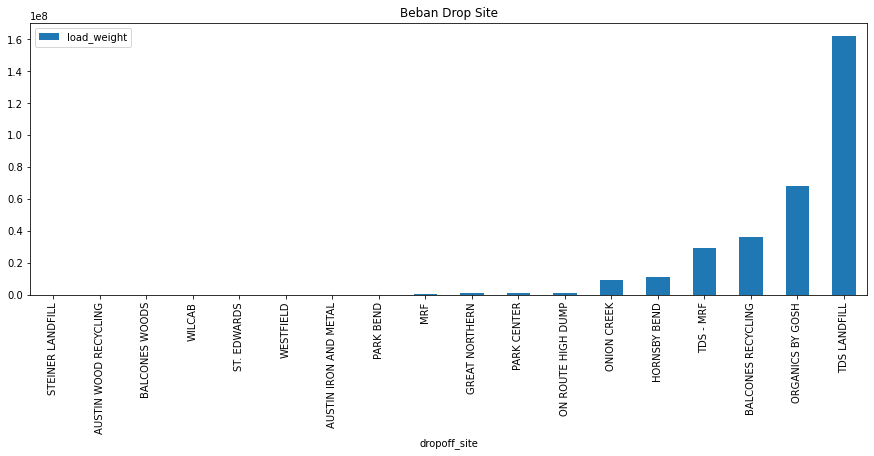

In [257]:
data_beban_dropsite.plot(x='dropoff_site',
                  y='load_weight', 
                  title='Beban Drop Site',
                   figsize=(15,5),
                   kind='bar')

In [258]:
#melihat beban load type
data_beban_load_type=df.groupby('load_type')['load_weight'].sum().sort_values()
data_beban_load_type

load_type
CONTAMINATED RECYCLING       5.160000e+03
DEAD ANIMAL                  2.465000e+04
CONTAMINATED ORGANICS        2.538000e+04
RECYCLED METAL               8.567000e+04
LITTER                       1.286800e+05
TIRES                        3.097870e+05
MIXED LITTER                 1.051780e+06
YARD TRIMMING                1.504520e+06
BRUSH                        9.473580e+06
BULK                         1.294074e+07
SWEEPING                     1.510148e+07
RECYCLING - SINGLE STREAM    6.495443e+07
ORGANICS                     6.808857e+07
GARBAGE COLLECTIONS          1.451591e+08
Name: load_weight, dtype: float64

In [259]:
data_beban_load_type=data_beban_load_type.to_frame().reset_index()
data_beban_load_type.columns=['load_type','load_weight']
data_beban_load_type

,load_type,load_weight
0,CONTAMINATED RECYCLING,5.160000e+03
1,DEAD ANIMAL,2.465000e+04
2,CONTAMINATED ORGANICS,2.538000e+04
3,RECYCLED METAL,8.567000e+04
4,LITTER,1.286800e+05
5,TIRES,3.097870e+05
6,MIXED LITTER,1.051780e+06
7,YARD TRIMMING,1.504520e+06
8,BRUSH,9.473580e+06
9,BULK,1.294074e+07


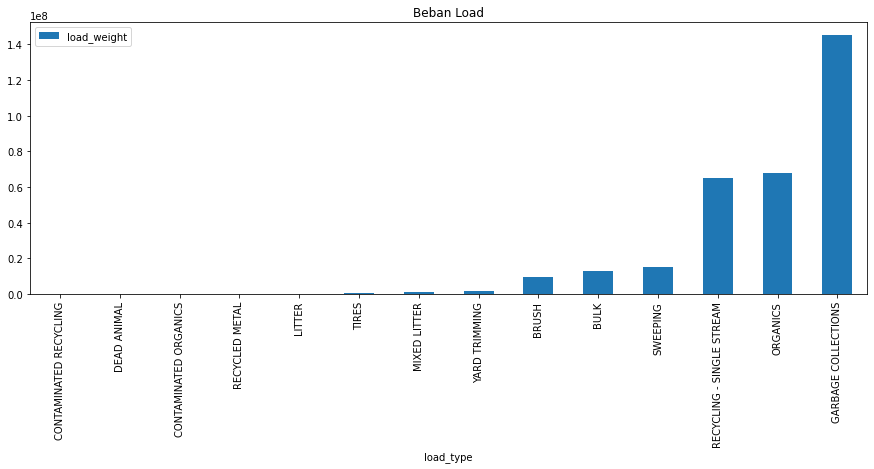

In [260]:
data_beban_load_type.plot(x='load_type',
                  y='load_weight', 
                  title='Beban Load',
                   figsize=(15,5),
                   kind='bar')

***(mean, median, dan modus) untuk masing-masing site***

In [261]:
#show data
df

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-07-08,2021-07-08 12:00:00 UTC,TIRES,2260.0,MRF
1,2021-07-08,2021-07-08 11:00:00 UTC,TIRES,1260.0,MRF
2,2021-07-08,2021-07-08 03:00:00 UTC,TIRES,800.0,MRF
3,2021-05-01,2021-05-01 12:29:00 UTC,TIRES,760.0,MRF
4,2021-07-03,2021-07-03 12:09:00 UTC,TIRES,1400.0,MRF
...,...,...,...,...,...
26152,2021-03-01,2021-03-01 11:26:00 UTC,ORGANICS,12100.0,ORGANICS BY GOSH
26153,2021-03-01,2021-03-01 04:27:00 UTC,ORGANICS,10900.0,ORGANICS BY GOSH
26154,2021-03-01,2021-03-01 05:55:00 UTC,ORGANICS,21800.0,ORGANICS BY GOSH
26155,2021-03-01,2021-03-02 01:10:00 UTC,ORGANICS,5640.0,ORGANICS BY GOSH


In [262]:
#hitung mean dan median per site
df2=df.groupby(['dropoff_site']).agg({'load_weight':['mean','median']})
df2

load_weight         
                               mean   median
dropoff_site                                
AUSTIN IRON AND METAL    451.200000    400.0
AUSTIN WOOD RECYCLING   4050.000000   4050.0
BALCONES RECYCLING      9464.652072   9840.0
BALCONES WOODS          8460.000000   8460.0
GREAT NORTHERN         11973.142857  11300.0
HORNSBY BEND            6637.111782   6400.0
MRF                     1799.982143   1360.0
ON ROUTE HIGH DUMP     11405.925926  11300.0
ONION CREEK            11300.000000  11300.0
ORGANICS BY GOSH       11817.220851  11900.0
PARK BEND              13385.000000  12330.0
PARK CENTER            11300.000000  11300.0
ST. EDWARDS            11300.000000  11300.0
STEINER LANDFILL         780.000000    780.0
TDS - MRF               9872.550882  10330.0
TDS LANDFILL           15168.321726  14920.0
WESTFIELD              16020.000000  16020.0
WILCAB                 11300.000000  11300.0

In [263]:
#hitung Modus
df3=df.groupby(['dropoff_site'])['load_weight'].apply(pd.Series.mode)
df3

dropoff_site            
AUSTIN IRON AND METAL  0      260.0
                       1      320.0
                       2      520.0
AUSTIN WOOD RECYCLING  0     2340.0
                       1     5760.0
BALCONES RECYCLING     0    11880.0
BALCONES WOODS         0     8460.0
GREAT NORTHERN         0    11300.0
HORNSBY BEND           0     5500.0
MRF                    0      960.0
ON ROUTE HIGH DUMP     0    11300.0
ONION CREEK            0    11300.0
ORGANICS BY GOSH       0    11300.0
PARK BEND              0     8480.0
                       1     8960.0
                       2    15700.0
                       3    20400.0
PARK CENTER            0    11300.0
ST. EDWARDS            0    11300.0
STEINER LANDFILL       0      780.0
TDS - MRF              0    10360.0
TDS LANDFILL           0       20.0
                       1       60.0
                       2    12020.0
WESTFIELD              0    16020.0
WILCAB                 0    11300.0
Name: load_weight, dtype: float64

**insight dari peneliti Berdasarkan central tendency:
karena banyaknya nilai mean dan median sama bisa disimpulkan
distribusi skor normal. diluar dari peneliti temukan mohon diperhatikan kembali untuk distribusinya atau bisa ditambahkan sitenya**

*   PARK CENTER
*   ST. EDWARDS


*   ONION CREEK
*   BALCONES WOODS


*   AUSTIN WOOD RECYCLING
*   STEINER LANDFILL


*   WESTFIELD
*   WILCAB











**site yang paling menarik**
TDS LANDFILL karena sitenya lebih banyak 2 kali lipat dari posisi ke 2

In [264]:
#TDS LANDFILL 
TDS_LANDFILL=df[(df['dropoff_site']=='TDS LANDFILL')]
TDS_LANDFILL

,report_date,load_time,load_type,load_weight,dropoff_site
383,2021-01-23,2021-01-23 11:12:00 UTC,BULK,9940.0,TDS LANDFILL
384,2021-01-23,2021-01-23 01:10:00 UTC,BULK,1960.0,TDS LANDFILL
385,2021-01-23,2021-01-23 12:31:00 UTC,BULK,10760.0,TDS LANDFILL
386,2021-01-23,2021-01-23 12:58:00 UTC,BULK,3920.0,TDS LANDFILL
387,2021-01-23,2021-01-23 12:25:00 UTC,BULK,13580.0,TDS LANDFILL
...,...,...,...,...,...
26110,2021-03-01,2021-03-01 01:04:00 UTC,SWEEPING,7280.0,TDS LANDFILL
26111,2021-03-01,2021-03-01 12:57:00 UTC,SWEEPING,4320.0,TDS LANDFILL
26112,2021-03-01,2021-03-01 01:40:00 UTC,RECYCLING - SINGLE STREAM,5320.0,TDS LANDFILL
26113,2021-03-01,2021-03-01 03:44:00 UTC,BULK,3660.0,TDS LANDFILL


**load_weight ada outlier atau tidak**

In [265]:
#TDS_LANDFILL cek tendencies
print ('Min: ' + str(TDS_LANDFILL['load_weight'].min()))
print ('Mode: ' + str(TDS_LANDFILL['load_weight'].mode()[0]))
print ('Median: ' + str(TDS_LANDFILL['load_weight'].median()))
print ('Mean: ' + str(TDS_LANDFILL['load_weight'].mean()))
print ('Max: ' + str(TDS_LANDFILL['load_weight'].max()))

Min: 0.0
Mode: 20.0
Median: 14920.0
Mean: 15168.321726145503
Max: 245540.0


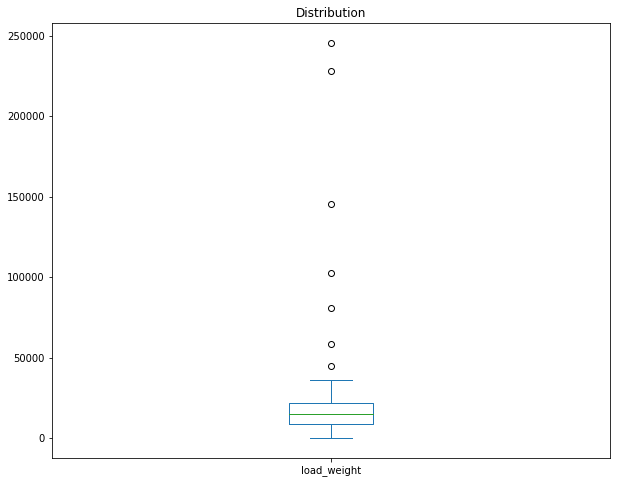

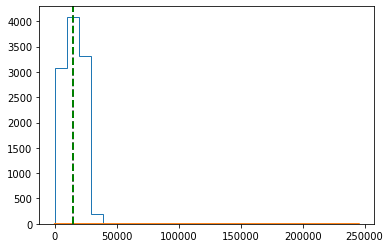

In [266]:
# Plot a box-whisker chart
TDS_LANDFILL['load_weight'].plot(kind='box', title='Distribution', figsize=(10,8))
plt.show()

# Visualization of Distribution
tds = TDS_LANDFILL['load_weight']
density = stats.gaussian_kde(tds)
n, x, _ = plt.hist(tds, histtype='step', bins=25)  
plt.plot(x, density(x)*2**7.5)
plt.axvline(tds.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(tds.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

In [267]:
TDS_LANDFILL.describe()

,load_weight
count,10694.000000
mean,15168.321726
std,8590.068498
min,0.000000
25%,8820.000000
50%,14920.000000
75%,21660.000000
max,245540.000000


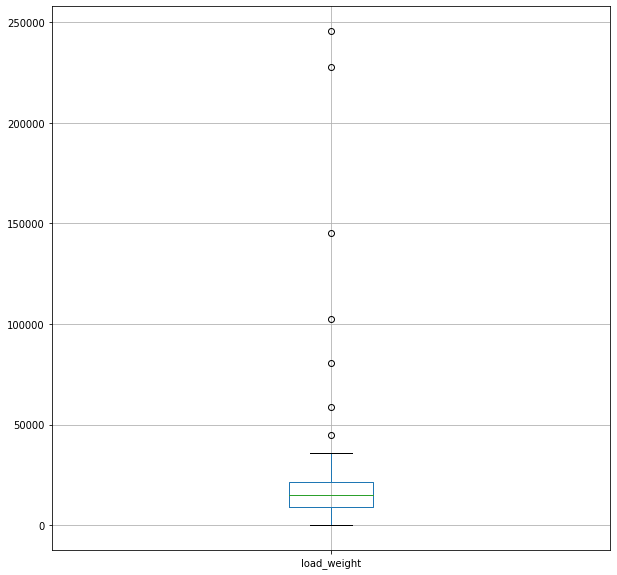

In [268]:
#cari outlier
plt.figure(figsize=(10,10)) 
TDS_LANDFILL.boxplot()
plt.show()

In [269]:
#percentile 5% batas bawah
lower_limit=TDS_LANDFILL['load_weight'].quantile(0.05)
lower_limit

2540.0

In [270]:
#menampilkan data lower limit
TDS_LANDFILL[TDS_LANDFILL['load_weight']<lower_limit]

,report_date,load_time,load_type,load_weight,dropoff_site
384,2021-01-23,2021-01-23 01:10:00 UTC,BULK,1960.0,TDS LANDFILL
397,2021-01-23,2021-01-23 10:38:00 UTC,BULK,2260.0,TDS LANDFILL
494,2021-02-27,2021-02-27 01:35:00 UTC,BULK,2340.0,TDS LANDFILL
546,2021-01-09,2021-01-08 12:50:00 UTC,DEAD ANIMAL,120.0,TDS LANDFILL
547,2021-01-16,2021-01-16 12:46:00 UTC,DEAD ANIMAL,20.0,TDS LANDFILL
...,...,...,...,...,...
25586,2021-02-25,2021-02-25 01:07:00 UTC,SWEEPING,2280.0,TDS LANDFILL
25588,2021-02-25,2021-02-25 09:46:00 UTC,BULK,780.0,TDS LANDFILL
25776,2021-02-26,2021-02-26 09:01:00 UTC,GARBAGE COLLECTIONS,1100.0,TDS LANDFILL
25823,2021-02-26,2021-02-26 01:21:00 UTC,SWEEPING,1780.0,TDS LANDFILL


In [271]:
#percentile batas atas 95%
uper_limit=TDS_LANDFILL['load_weight'].quantile(0.95)
uper_limit

27260.0

In [272]:
#menampilkan data diatas upper limit
TDS_LANDFILL[TDS_LANDFILL['load_weight']>uper_limit]

,report_date,load_time,load_type,load_weight,dropoff_site
421,2021-07-08,2021-07-08 03:37:00 UTC,BULK,28000.0,TDS LANDFILL
619,2021-02-21,2021-02-21 11:19:00 UTC,GARBAGE COLLECTIONS,30220.0,TDS LANDFILL
620,2021-02-21,2021-02-21 09:47:00 UTC,GARBAGE COLLECTIONS,29140.0,TDS LANDFILL
626,2021-02-21,2021-02-21 12:58:00 UTC,GARBAGE COLLECTIONS,30960.0,TDS LANDFILL
627,2021-02-21,2021-02-21 12:47:00 UTC,GARBAGE COLLECTIONS,31380.0,TDS LANDFILL
...,...,...,...,...,...
25784,2021-02-26,2021-02-26 01:23:00 UTC,GARBAGE COLLECTIONS,30620.0,TDS LANDFILL
25786,2021-02-26,2021-03-02 12:00:00 UTC,GARBAGE COLLECTIONS,30400.0,TDS LANDFILL
26037,2021-03-01,2021-03-01 01:30:00 UTC,GARBAGE COLLECTIONS,28900.0,TDS LANDFILL
26064,2021-03-01,2021-03-01 01:13:00 UTC,GARBAGE COLLECTIONS,28200.0,TDS LANDFILL


In [273]:
#Remove Outlier
TDS_LANDFILL_NO_OUTLIER=TDS_LANDFILL[(TDS_LANDFILL['load_weight']>lower_limit)&(TDS_LANDFILL['load_weight']<uper_limit)]
TDS_LANDFILL_NO_OUTLIER

,report_date,load_time,load_type,load_weight,dropoff_site
383,2021-01-23,2021-01-23 11:12:00 UTC,BULK,9940.0,TDS LANDFILL
385,2021-01-23,2021-01-23 12:31:00 UTC,BULK,10760.0,TDS LANDFILL
386,2021-01-23,2021-01-23 12:58:00 UTC,BULK,3920.0,TDS LANDFILL
387,2021-01-23,2021-01-23 12:25:00 UTC,BULK,13580.0,TDS LANDFILL
388,2021-01-23,2021-01-23 07:39:00 UTC,BULK,5620.0,TDS LANDFILL
...,...,...,...,...,...
26110,2021-03-01,2021-03-01 01:04:00 UTC,SWEEPING,7280.0,TDS LANDFILL
26111,2021-03-01,2021-03-01 12:57:00 UTC,SWEEPING,4320.0,TDS LANDFILL
26112,2021-03-01,2021-03-01 01:40:00 UTC,RECYCLING - SINGLE STREAM,5320.0,TDS LANDFILL
26113,2021-03-01,2021-03-01 03:44:00 UTC,BULK,3660.0,TDS LANDFILL


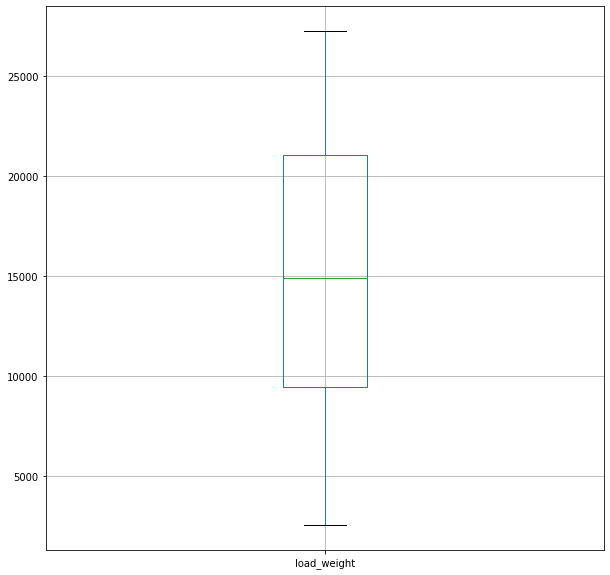

In [274]:
#cari outlier
plt.figure(figsize=(10,10)) 
TDS_LANDFILL_NO_OUTLIER.boxplot()
plt.show()

In [275]:
#CEK JUMLAH OUTLIER YANG TERHAPUS
ot=TDS_LANDFILL.shape[0]-TDS_LANDFILL_NO_OUTLIER.shape[0]
ot

1081

In [276]:
#hitung load_weight
jm=TDS_LANDFILL['load_weight'].count()
jm

10694

In [277]:
#persentasi Otlier
print(jm/ot*0.100)

0.9892691951896393


6.**range, variance, dan standar deviasi untuk data load_weight**

In [301]:
print(TDS_LANDFILL_NO_OUTLIER['load_weight'].name + ' range: ' + str(TDS_LANDFILL_NO_OUTLIER['load_weight'].max() - TDS_LANDFILL_NO_OUTLIER['load_weight'].min()))
print(TDS_LANDFILL_NO_OUTLIER['load_weight'].var())
print(TDS_LANDFILL_NO_OUTLIER['load_weight'].std())

load_weight range: 24680.0
46402468.08257337
6811.935707460352


7.**Pemerintah kota berencana menambah site baru**

In [287]:
t_stat,p_val = stats.ttest_1samp(TDS_LANDFILL_NO_OUTLIER.load_weight, 27240)
print('P-value:',p_val/2) #The p-value divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat)

P-value: 0.0
t-statistics: -175.0457590515273


p-value:0 untuk confidence tes max load, jadi tidak usa ada site baru untuk di TDS LANDFILL, data yang dibutuhkan hanya 1 site dikarenakan hanya site ini yang peneliti hapus outliernya

hypothesis on this case:

H0: mean=15078

H1: mean!=15078

In [289]:
t_stat,p_val = stats.ttest_1samp(TDS_LANDFILL_NO_OUTLIER.load_weight, 27240)
print('P-value:',p_val/2) #The p-value divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat)

P-value: 0.0
t-statistics: -175.0457590515273


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


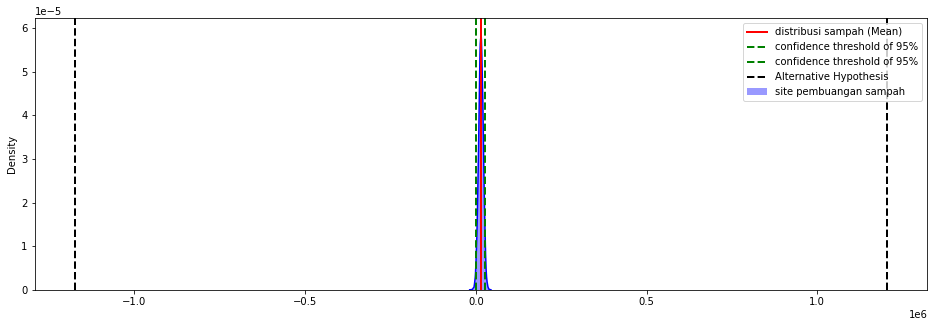

In [293]:
TDS_LANDFILL_NO_OUTLIER_pop = np.random.normal(TDS_LANDFILL_NO_OUTLIER.load_weight.mean(), TDS_LANDFILL_NO_OUTLIER.load_weight.std(), 10000)

ci = stats.norm.interval(0.95, TDS_LANDFILL_NO_OUTLIER.load_weight.mean(), TDS_LANDFILL_NO_OUTLIER.load_weight.std())

plt.figure(figsize=(16,5))
sns.distplot(TDS_LANDFILL_NO_OUTLIER_pop, label='site pembuangan sampah', color='blue')
plt.axvline(TDS_LANDFILL_NO_OUTLIER.load_weight.mean(), color='red', linewidth=2, label='distribusi sampah (Mean)')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

plt.axvline(TDS_LANDFILL_NO_OUTLIER_pop.mean() + t_stat*TDS_LANDFILL_NO_OUTLIER_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(TDS_LANDFILL_NO_OUTLIER_pop.mean() - t_stat*TDS_LANDFILL_NO_OUTLIER_pop.std(), color='black', linestyle='dashed', linewidth=2)
plt.legend()

untuk analisa perhari ternyata tidak sama dengan rata-rata
hipotesannya adalah untuk peneliti tolak h-0.
untuk pemerintah:di site tds landfil harap segerang dihilangkan outliernya yang artinya hilangkan tumpukan sampah berlebih dengan menambahkan loading sampahnya.

Jawab pertanyaan berikut untuk mengasah pemahaman konsepmu!

Teknik apa yang kamu pilih untuk handling outlier? jelaskan alasannya!

---
**IQR, dikarenakan distribusi tidak normal**

---



Apa konsep dibalik confidence interval sehingga kita dapat menggunakannya untuk menyelesaikan langkah pada nomor 7?

**Nilai p dibagi 2 karena outputnya adalah nilai p dua sisi**

---


Jelaskan jenis uji hipotesis apa yang kamu terapkan dan mengapa?

---
**hipotesisnya adalah apakah nilai rata2 menjadi nilai harian setelah di hapus outliernya**
mengapa?

---

karena pemerintah butuh masukan apakah site butuh tambahan loading.



**Problem 2 (Math/Calculus)**

In [300]:
df

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-07-08,2021-07-08 12:00:00 UTC,TIRES,2260.0,MRF
1,2021-07-08,2021-07-08 11:00:00 UTC,TIRES,1260.0,MRF
2,2021-07-08,2021-07-08 03:00:00 UTC,TIRES,800.0,MRF
3,2021-05-01,2021-05-01 12:29:00 UTC,TIRES,760.0,MRF
4,2021-07-03,2021-07-03 12:09:00 UTC,TIRES,1400.0,MRF
...,...,...,...,...,...
26152,2021-03-01,2021-03-01 11:26:00 UTC,ORGANICS,12100.0,ORGANICS BY GOSH
26153,2021-03-01,2021-03-01 04:27:00 UTC,ORGANICS,10900.0,ORGANICS BY GOSH
26154,2021-03-01,2021-03-01 05:55:00 UTC,ORGANICS,21800.0,ORGANICS BY GOSH
26155,2021-03-01,2021-03-02 01:10:00 UTC,ORGANICS,5640.0,ORGANICS BY GOSH


In [305]:
#Pembuatan Function
def lajuPenambahan(a):
  v=df['load_time'].count()/df['load_weight']
  return(v)

def besok(a):
  b=df['load_time'].count()+lajuPenambahan(a)*df['load_weight']
  return(b)

In [306]:
#pembuatan groupby dan turunan 1
penambahan=df.groupby('report_date')['load_weight'].diff().sort_values()
penambahan

13818   -225240.0
16965   -204580.0
2382    -125180.0
24240   -100500.0
13633    -58537.0
           ...   
24917         NaN
25157         NaN
25414         NaN
25691         NaN
25916         NaN
Name: load_weight, Length: 26157, dtype: float64

In [307]:
#penambahan sampah tiap harinya
lajuPenambahan(penambahan)

0        11.573894
1        20.759524
2        32.696250
3        34.417105
4        18.683571
           ...    
26152     2.161736
26153     2.399725
26154     1.199862
26155     4.637766
26156    72.658333
Name: load_weight, Length: 26157, dtype: float64

In [308]:
#memprediksi jumlah load sampah hari esok
besok(penambahan)

0        52314.0
1        52314.0
2        52314.0
3        52314.0
4        52314.0
          ...   
26152    52314.0
26153    52314.0
26154    52314.0
26155    52314.0
26156    52314.0
Name: load_weight, Length: 26157, dtype: float64

Untuk menghitung turunan pertama dapat digunakan metode simbolik dan numerik, untuk kasus ini, teknik apa yang kamu gunakan?
**pakai method diff()**

---


Apakah kamu membutuhkan fungsi matematis untuk menghitung turunannya? (ya/tidak) berikan alasanmu!**tidak karena pakai fungsi diff()**
Berapa load weight yang kamu perkirakan 